In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

from pylab import rcParams

rcParams['figure.figsize'] = 10, 10

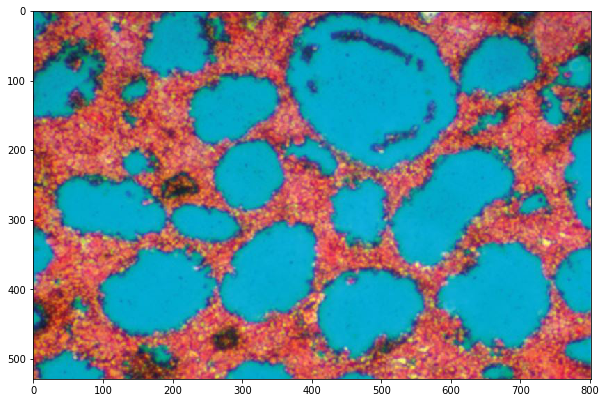

In [51]:
img = plt.imread("../imgs/porosidadalta.jpg")

rcParams["figure.figsize"] = 10,10
plt.imshow(img)

In [52]:
img.shape

(529, 802, 3)

In [53]:
img[:2]

array([[[ 18, 140, 164],
        [ 11, 131, 156],
        [  7, 122, 149],
        ...,
        [158,  58,  86],
        [160,  54, 103],
        [176,  70, 119]],

       [[ 22, 146, 170],
        [ 15, 139, 163],
        [ 12, 132, 157],
        ...,
        [159,  58,  90],
        [161,  53, 102],
        [177,  69, 118]]], dtype=uint8)

In [54]:
img = img/255
img.shape

(529, 802, 3)

In [55]:
img[:2]

array([[[0.07058824, 0.54901961, 0.64313725],
        [0.04313725, 0.51372549, 0.61176471],
        [0.02745098, 0.47843137, 0.58431373],
        ...,
        [0.61960784, 0.22745098, 0.3372549 ],
        [0.62745098, 0.21176471, 0.40392157],
        [0.69019608, 0.2745098 , 0.46666667]],

       [[0.08627451, 0.57254902, 0.66666667],
        [0.05882353, 0.54509804, 0.63921569],
        [0.04705882, 0.51764706, 0.61568627],
        ...,
        [0.62352941, 0.22745098, 0.35294118],
        [0.63137255, 0.20784314, 0.4       ],
        [0.69411765, 0.27058824, 0.4627451 ]]])

In [56]:
n_clusters = 3

m, l, k = img.shape[0], img.shape[1], img.shape[2]

df = pd.DataFrame(img.reshape(m*l,k))
print(df)

               0         1         2
0       0.070588  0.549020  0.643137
1       0.043137  0.513725  0.611765
2       0.027451  0.478431  0.584314
3       0.035294  0.462745  0.576471
4       0.050980  0.443137  0.568627
...          ...       ...       ...
424253  0.780392  0.388235  0.247059
424254  0.788235  0.388235  0.231373
424255  0.796078  0.392157  0.223529
424256  0.764706  0.427451  0.243137
424257  0.811765  0.474510  0.290196

[424258 rows x 3 columns]


In [57]:
df.columns = ["R", "G", "B"]
print(df.head())

          R         G         B
0  0.070588  0.549020  0.643137
1  0.043137  0.513725  0.611765
2  0.027451  0.478431  0.584314
3  0.035294  0.462745  0.576471
4  0.050980  0.443137  0.568627


In [58]:
kmeans = KMeans(n_clusters = n_clusters)
kmeans.fit(df)
df["clusters"] = kmeans.labels_

In [59]:
df.sample(5)


,R,G,B,clusters
230678,0.266667,0.309804,0.721569,2
179983,0.003922,0.686275,0.792157,0
116459,0.607843,0.133333,0.309804,1
36364,0.305882,0.184314,0.247059,2
36794,0.407843,0.200000,0.364706,2


In [60]:
centers = pd.DataFrame(kmeans.cluster_centers_)
centers["clusters"] = range(n_clusters)

In [61]:
df["ind"] = df.index
df = df.merge(centers)
df = df.sort_values("ind")
df = df.drop("ind", 1)

In [62]:
quant_img = df.iloc[:,4:7].values

quant_img = quant_img.reshape(img.shape[0], img.shape[1], img.shape[2])

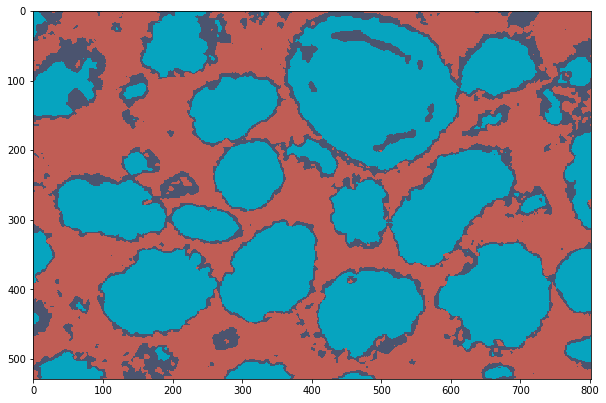

In [63]:
plt.imshow(quant_img)

In [64]:
again_img = quant_img*255
print(again_img)

[[[  6.60074473 164.74461635 191.74064554]
  [  6.60074473 164.74461635 191.74064554]
  [  6.60074473 164.74461635 191.74064554]
  ...
  [192.98971934  93.05457084  85.58531902]
  [192.98971934  93.05457084  85.58531902]
  [192.98971934  93.05457084  85.58531902]]

 [[  6.60074473 164.74461635 191.74064554]
  [  6.60074473 164.74461635 191.74064554]
  [  6.60074473 164.74461635 191.74064554]
  ...
  [192.98971934  93.05457084  85.58531902]
  [192.98971934  93.05457084  85.58531902]
  [192.98971934  93.05457084  85.58531902]]

 [[  6.60074473 164.74461635 191.74064554]
  [  6.60074473 164.74461635 191.74064554]
  [  6.60074473 164.74461635 191.74064554]
  ...
  [192.98971934  93.05457084  85.58531902]
  [192.98971934  93.05457084  85.58531902]
  [192.98971934  93.05457084  85.58531902]]

 ...

 [[192.98971934  93.05457084  85.58531902]
  [192.98971934  93.05457084  85.58531902]
  [192.98971934  93.05457084  85.58531902]
  ...
  [192.98971934  93.05457084  85.58531902]
  [192.98971934  9

In [65]:
df2 = pd.DataFrame(again_img.reshape(m*l,k))
df2.columns = ["R", "G", "B"]

In [66]:
print(df2)


                 R           G           B
0         6.600745  164.744616  191.740646
1         6.600745  164.744616  191.740646
2         6.600745  164.744616  191.740646
3         6.600745  164.744616  191.740646
4         6.600745  164.744616  191.740646
...            ...         ...         ...
424253  192.989719   93.054571   85.585319
424254  192.989719   93.054571   85.585319
424255  192.989719   93.054571   85.585319
424256  192.989719   93.054571   85.585319
424257  192.989719   93.054571   85.585319

[424258 rows x 3 columns]


In [67]:
print(df2.R.unique())
print(df2.G.unique())
print(df2.B.unique())

[  6.60074473  75.94201591 192.98971934]
[164.74461635  84.64535389  93.05457084]
[191.74064554 111.34331174  85.58531902]


In [68]:
contados = df2.apply(pd.value_counts).sum(axis=1)
print(contados)

6.600745      182188.0
75.942016      61023.0
84.645354      61023.0
85.585319     181047.0
93.054571     181047.0
111.343312     61023.0
164.744616    182188.0
191.740646    182188.0
192.989719    181047.0
dtype: float64


In [69]:
total = pd.unique(contados)
print(total)

[182188.  61023. 181047.]


In [70]:
suma = total.sum()
porcentaje = (total/suma)*100
print(porcentaje)
print("______________________ \n")
print("POROSIDAD = ", porcentaje[0])

[42.94273767 14.38346478 42.67379755]
______________________ 

POROSIDAD =  42.942737673773976
